In [1]:
import numpy as np
import pandas as pd
import string
from numpy import random
import random
import matplotlib.pyplot as plt

In [2]:
SEED = 100
random.seed(SEED) #ensure repeatability

In [3]:
class Employee_Productivity:
    def __init__(self, inputs):
        # Assumptions: employee data generated for an entire entire area/zip code impacted by an outage
        self.outage_dict = {'outage_id': inputs[0],
         'total_employees': inputs[1],
         'affected_employees': inputs[2],
         'cost_per_hour': inputs[3],
         'downtime_hours': inputs[4]}
    
    def estimateEmployeeProductivity(self): 
        """A method to quantify employee productivity cost"""    
        percentage_affected = self.outage_dict['affected_employees']/self.outage_dict['total_employees'] # percentage of the affected employees
        prod_loss =  self.outage_dict['total_employees']*percentage_affected*self.outage_dict['cost_per_hour']*self.outage_dict['downtime_hours']
        return prod_loss

In [8]:
def simulateOutage(num_outages=500):
    """Simulate an arbitrary number of outages in order to quantify employee productivity.
    Assumptions for the random generation: Number of total employees in the outage territory
    varies between 350-500. 
    """
    employee_productivity_loss = []
    def id_generator(size=6, chars=string.ascii_uppercase + string.digits):
        return ''.join(random.choice(chars) for _ in range(size))
    for i in range(num_outages):
        outage = []
        outage.append(id_generator())
        #TODO: collect MASS-specific data for the outages
        outage.append(random.randint(350, 500)) # generate a random number of total employees
        outage.append(random.randint(50, 100)) # generate a random number of affected employees
        outage.append(random.uniform(30, 60)) # generate cost per hours
        outage.append(random.uniform(1, 10)) # generate outage duration in hours
        employee_productivity_loss.append(outage)
    return employee_productivity_loss

In [9]:
def calculateEmployeeProductivityLoss():
    """Calculate the employee productivity loss associated with simulated outages."""
    total_loss = 0
    total_productivity_loss = []
    broadband_outages = simulateOutage()
    for outage in broadband_outages:
        total_productivity_loss.append(Employee_Productivity(outage))    
    for tpl in total_productivity_loss:
        # print("Total employee productivity loss for outage", tpl.outage_dict['outage_id'],"amounts to", "$"+str(tpl.estimateEmployeeProductivity()))
        total_loss += tpl.estimateEmployeeProductivity()
    return total_productivity_loss, total_loss

In [10]:
def visualizeEstimatedProductivityLoss(cepl, employees=False):
    """Visualize estimated employee productivity loss based on the duration of a 
     a broadband outage or number of affected employees."""
    estimated_productivity_loss = []
    x_var = []
    for i in range(len(cepl[0])):
        estimated_productivity_loss.append(cepl[0][i].estimateEmployeeProductivity())
        if employees:
            x_var.append(cepl[0][i].outage_dict['affected_employees'])
        else:
            x_var.append(cepl[0][i].outage_dict['downtime_hours'])
    # print(estimated_productivity_loss)
    # print(outage_duration)
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    fig.subplots_adjust(top=1.30)
    ax.plot(x_var, estimated_productivity_loss, 'ro')
    ax.set_title('Measuring employee productivity loss due to broadband outages', fontsize= 20)
    if employees:
        ax.set_xlabel('Number of affected employees', fontsize= 15)
    else:
        ax.set_xlabel('Broadband outage duration (hours)', fontsize= 15)
    ax.set_ylabel('Estimated productivity loss ($)', fontsize= 15)
    plt.show()

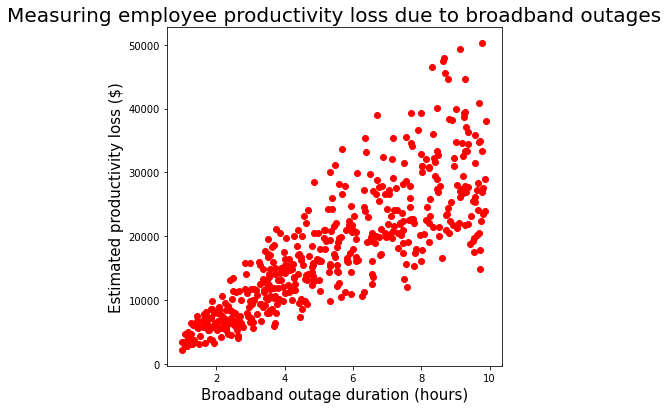

In [12]:
visualizeEstimatedProductivityLoss(calculateEmployeeProductivityLoss())

In [152]:
def estimateBroadbandBenefits(cepl): #TODO
    """Broadband benefit estimation based on residential and commercial data"""
    visualizeEstimatedProductivityLoss(cepl)

In [149]:
def estimateIndustrialProductivity(employee_productivity,):
    """A method to quantify industrial productivity cost"""
    return # TODO

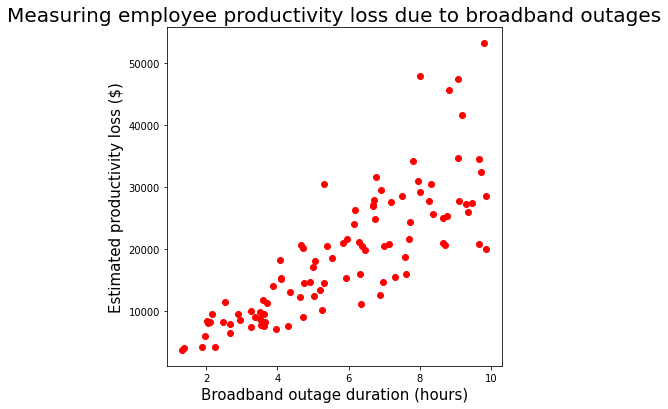

In [154]:
estimateBroadbandBenefits(calculateEmployeeProductivityLoss())